In [2]:
import pandas as pd
#import geopandas as gpd
import re
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import plotly.express as px
import os


In [22]:
df = pd.read_csv('fangstdata\elektronisk-rapportering-ers-2019-fangstmelding-dca.csv', low_memory=False, delimiter=';', encoding='utf8')


In [23]:
print(df[df['Sildebestand'] == 'Norsk vårgytende sild'])

        Relevant år  Meldingsår Meldingstype (kode)  \
72             2019        2019                 DCA   
73             2019        2019                 DCA   
311            2019        2019                 DCA   
312            2019        2019                 DCA   
313            2019        2019                 DCA   
...             ...         ...                 ...   
345229         2019        2019                 DCA   
346248         2019        2019                 DCA   
346249         2019        2019                 DCA   
346514         2019        2019                 DCA   
346515         2019        2019                 DCA   

                                 Meldingstype  Meldingsnummer  \
72      Detaljert Fangst og aktivitetsmelding               1   
73      Detaljert Fangst og aktivitetsmelding               1   
311     Detaljert Fangst og aktivitetsmelding               2   
312     Detaljert Fangst og aktivitetsmelding               2   
313     Detalj

Text(0, 0.5, 'Amount of catches')

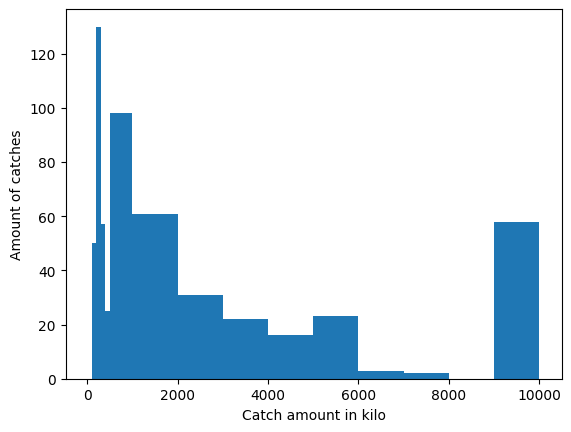

In [10]:
df = pd.read_csv('cleaned_datasets\herring_catches_2020.csv')
plt.hist(df['Rundvekt'],[20,100,200,300,400,500,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.xlabel('Catch amount in kilo')
plt.ylabel("Amount of catches")

In [12]:

#change this function to store different data
def read_and_store_herring_data(year):
    if year == 2021:
        string = 'fangstdata\S_DR_FANGST_ERS_DCA_FARTOY_2021_PR_2022-03-07.csv'
    else:
        string ='fangstdata\elektronisk-rapportering-ers-' + str(year) + '-fangstmelding-dca.csv'
    catch_data = pd.read_csv(string,delimiter=';', on_bad_lines='skip', encoding='utf8')
    if year == 2018: 
        herring_catches = catch_data.loc[catch_data['Art - FDIR'] == 'Sild']
    else:
        herring_catches = catch_data.loc[catch_data['Sildebestand'] == 'Norsk Vårgytende Sild']
    herring_catches = herring_catches.loc[herring_catches['Rundvekt'] > 100]
    latitude_start = pd.to_numeric([pos.replace(',','.') for pos in herring_catches['Startposisjon bredde']])
    longitude_start = pd.to_numeric([pos.replace(',','.') for pos in herring_catches['Startposisjon lengde']])
    latitude_stopp = pd.to_numeric([pos.replace(',','.') for pos in herring_catches['Stopposisjon bredde']])
    longitude_stopp = pd.to_numeric([pos.replace(',','.') for pos in herring_catches['Stopposisjon lengde']])
    fangststart = pd.to_numeric([klokkeslett.split(':')[0] for klokkeslett in herring_catches['Startklokkeslett']])
    fangstslutt = pd.to_numeric([klokkeslett.split(':')[0] for klokkeslett in herring_catches['Stoppklokkeslett']])
    Registreringsmerke = herring_catches['Registreringsmerke']
    for i in range(len(fangststart)):
        if fangststart[i] > fangstslutt[i]:
            fangstslutt[i] = 23 #this ensures that in case the catch happens overnight, i simplify the data so other functions dont get confuses.
    longitude = (longitude_start + longitude_stopp) /2
    latitude = (latitude_start+ latitude_stopp)/2
    Rundvekt = pd.to_numeric([vekt for vekt in herring_catches['Rundvekt']])
    day = pd.to_numeric([date.split('.')[0] for date in herring_catches['Startdato']])
    month = pd.to_numeric([date.split('.')[1] for date in herring_catches['Startdato']]) 
    catch_year = pd.to_numeric([date.split('.')[2] for date in herring_catches['Startdato']])


    
    data = {'longitude': longitude,
        'latitude': latitude,
        'latitude_start' : latitude_start,
        'longitude_start' : longitude_start,
        'latitude_stopp' : latitude_stopp,
        'longitude_stopp' : longitude_stopp,
        'Rundvekt': Rundvekt,
        'fangststart' : fangststart,
        'fangstslutt' : fangstslutt,
        'day' : day,
        'month': month,
        'year':  catch_year,
        'Registreringsmerke': Registreringsmerke
    }
    df = pd.DataFrame(data)


    '''
    last_line = df.iloc[1]
    idxes_to_drop = []
    for idx, row in df.iterrows():
        if idx == 0 or idx == 1: # or last_line == None or last_line.empty(): 
            last_line = row
            continue
        if row['Registreringsmerke'] == last_line['Registreringsmerke'] and \
            row['latitude'] == last_line['latitude'] and \
                row['longitude'] == last_line['longitude'] and \
                    row['day'] == last_line['day'] and \
                        row['fangststart'] == last_line['fangststart'] and \
                            row['fangstslutt'] == last_line['fangstslutt']: 
                                print(idx)
                                df.iloc[idx -1]['Rundvekt'] += row['Rundvekt']
                                idxes_to_drop.append(idx)

        last_line = row
    df.drop(idxes_to_drop, axis='index') '''
    print(Rundvekt)
    df.to_csv('cleaned_datasets/herring_catches_'+str(year)+'.csv')


for year in range(2018, 2019):
    if year in []: pass
    read_and_store_herring_data(year)

C:\Users\evenasm\AppData\Local\Temp\ipykernel_7056\3367159854.py:7: DtypeWarning: Columns (51,83,90) have mixed types. Specify dtype option on import or set low_memory=False.
  catch_data = pd.read_csv(string,delimiter=';', on_bad_lines='skip', encoding='utf8')


[]


In [35]:
fangst_data_2018 = pd.read_csv('cleaned_datasets/herring_catches_2018.csv', on_bad_lines='skip', encoding='utf8')
fangst_data_2019 = pd.read_csv('cleaned_datasets/herring_catches_2019.csv', on_bad_lines='skip', encoding='utf8')
fangst_data_2020 = pd.read_csv('cleaned_datasets/herring_catches_2020.csv', on_bad_lines='skip', encoding='utf8')
fangst_data = []
for year in range(2011,2022): 
    if year == 2018: pass
    fangst_data.append(pd.read_csv('cleaned_datasets/herring_catches_'+str(year)+'.csv', on_bad_lines='skip', encoding='utf8'))
#print(fangst_data_2018.head)
#fangst_data_2018.merge(fangst_data_2019)
#fangst_data_2018.merge(fangst_data_2020)
#print(fangst_data_2018.head)
fangst_totalt = pd.concat(fangst_data)

fangst_desember = fangst_totalt.loc[fangst_totalt['month'] ==12]
fangst_januar = fangst_totalt.loc[fangst_totalt['month'] == 1]
fangst_desember_og_januar = pd.concat([fangst_desember, fangst_januar])



Text(0.5, 1.0, 'Average number of catch events, december and january 2019-2021')

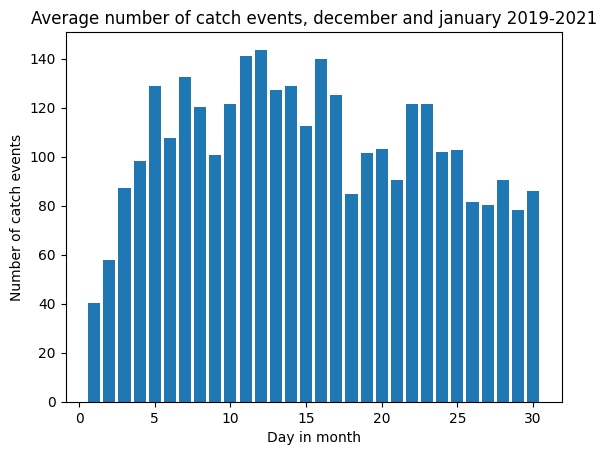

In [36]:
fangst_per_dag = [len(fangst_desember_og_januar[fangst_desember_og_januar['day'] == i])/ 3 for i in range(1,31)]
plt.bar([i for i in range(1,31)],fangst_per_dag)
plt.xlabel('Day in month')
plt.ylabel('Number of catch events')
plt.title('Average number of catch events, december and january 2019-2021')

In [26]:
#for i in range(len(Rundvekt)):
#    if Rundvekt[i] == 0:
#        Rundvekt[i] = 1zzzz
#plotter = {'latitude' : latitude, 'longitude': longitude, 'Rundvekt':Rundvekt, 'month': month}

#fig = px.density_mapbox(plotter, lat='longitude', lon='latitude',mapbox_style='stamen-terrain', opacity=.7, radius=5, title="Sildefangst 2018")
def scatterplot_on_map(df, _title, _color):
    fig = px.scatter_mapbox(df, lon='longitude', lat='latitude',color=_color, size='Rundvekt',
        center=dict(lat=65, lon=10),mapbox_style='stamen-terrain', title=_title,
        height=1000, zoom=4)

    fig.show()


<h3>Noen interessante plots kommer her, først,  et plott over 3 år med desember/januarfangst. Legg merke til 3 samlinger: <h3>

-  Kvænangen (Troms og Finnmark)
-  Til havs vest for Bodø
-  Mellom orknaøyene og Bergen (minst insidens)

In [34]:

scatterplot_on_map(fangst_januar, 'Sildefangst desember/januar 2019-2021', 'year')

<h3> Deretter har vi generell sildefangst per år, 2018, 2019 og 2020: </h3>

In [37]:
scatterplot_on_map(fangst_data_2018, 'Sildefangst 2018', 'month')

In [38]:
scatterplot_on_map(fangst_data_2019, 'Sildefangst 2019', 'month')

In [91]:
scatterplot_on_map(fangst_data_2020, 'Sildefangst 2020', 'month')

<h3> Total sildefangst over alle måneder i 3 år, farget etter år: </h3>

In [39]:
scatterplot_on_map(fangst_totalt, "Total fangst 2019-2021", 'year')

<h3> Total sildefangst 18/19/20, farget etter måned: </h3>

In [31]:
scatterplot_on_map(fangst_totalt, 'Sildefangst 2011-2020', 'month')

In [12]:
df = pd.read_csv('fangstdata\elektronisk-rapportering-ers-2018-fangstmelding-dca.csv',delimiter=';', on_bad_lines='skip', encoding='utf8')


C:\Users\evenasm\AppData\Local\Temp\ipykernel_8652\3340441708.py:1: DtypeWarning:

Columns (51,83,90) have mixed types. Specify dtype option on import or set low_memory=False.



Relevant år
Meldingsår
Meldingstype (kode)
Meldingstype
Meldingsnummer
Meldingsversjon
Sekvensnummer
Melding ID
Meldingstidspunkt
Meldingsdato
Meldingsklokkeslett
Radiokallesignal (ERS)
Fartøynavn (ERS)
Registreringsmerke (ERS)
Fartøynasjonalitet (kode)
Fartøygruppe (kode)
Fartøygruppe
Kvotetype (kode)
Kvotetype
Aktivitet (kode)
Aktivitet
Havn (kode)
Havn
Havn nasjonalitet
Starttidspunkt
Startdato
Startklokkeslett
Startposisjon bredde
Startposisjon lengde
Hovedområde start (kode)
Hovedområde start
Lokasjon start (kode)
Sone (kode)
Sone
Områdegruppering start (kode)
Områdegruppering start
Havdybde start
Stopptidspunkt
Stoppdato
Stoppklokkeslett
Varighet
Fangstår
Stopposisjon bredde
Stopposisjon lengde
Hovedområde stopp (kode)
Hovedområde stopp
Lokasjon stopp (kode)
Områdegruppering stopp (kode)
Områdegruppering stopp
Havdybde stopp
Trekkavstand
Pumpet fra fartøy
Redskap FAO (kode)
Redskap FAO
Redskap FDIR (kode)
Redskap FDIR
Redskap - gruppe (kode)
Redskap - gruppe
Redskap - hovedgruppe

In [21]:
import time

def predict_herring_distribution():
    time.sleep(5)
    for i in range(100):
        print('Dra og tren sit gløs er fortsatt oppe')

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
predict_herring_distribution()